In [3]:
from tensorflow.keras.callbacks import LearningRateScheduler

# Define a learning rate schedule
def lr_schedule(epoch):
    initial_lr = 0.001
    if epoch < 5:
        return initial_lr
    elif epoch < 10:
        return initial_lr * 0.1
    else:
        return initial_lr * 0.01

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Compile the model with Adam optimizer and sparse categorical crossentropy loss
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks (learning rate scheduler and early stopping)
lr_scheduler = LearningRateScheduler(lr_schedule)
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

# Train the model with data augmentation, learning rate scheduling, and early stopping
history = model.fit(datagen.flow(X_data, y_data, batch_size=32),
                    epochs=20,
                    steps_per_epoch=len(X_data) // 32,
                    callbacks=[lr_scheduler, early_stopping])

# Save the trained model
model.save('face_recognition_cnn_model.h5')


Epoch 1/20
4/4 [==============================] - 3s 100ms/step - loss: 2.3113 - accuracy: 0.7589 - lr: 0.0010
Epoch 2/20
4/4 [==============================] - 0s 100ms/step - loss: 1.8913 - accuracy: 0.6607 - lr: 0.0010
Epoch 3/20
4/4 [==============================] - 1s 139ms/step - loss: 0.7605 - accuracy: 0.7500 - lr: 0.0010
Epoch 4/20
4/4 [==============================] - 0s 105ms/step - loss: 0.2491 - accuracy: 0.9196 - lr: 0.0010
Epoch 5/20
4/4 [==============================] - 1s 111ms/step - loss: 0.0634 - accuracy: 0.9821 - lr: 0.0010
Epoch 6/20
4/4 [==============================] - 0s 105ms/step - loss: 0.3329 - accuracy: 0.8661 - lr: 1.0000e-04
Epoch 7/20
4/4 [==============================] - 0s 102ms/step - loss: 0.2518 - accuracy: 0.8571 - lr: 1.0000e-04
Epoch 8/20
4/4 [==============================] - 1s 117ms/step - loss: 0.1220 - accuracy: 0.9643 - lr: 1.0000e-04
Epoch 9/20
4/4 [==============================] - 1s 138ms/step - loss: 0.0706 - accuracy: 0.9821 - 

In [4]:
loss, accuracy = model.evaluate(X_data, y_data)
print("Accuracy:", accuracy)



5/5 [==============================] - 1s 26ms/step - loss: 0.0034 - accuracy: 1.0000
Accuracy: 1.0


In [8]:
%load_ext tensorboard 

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [9]:
tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 16732), started 0:01:00 ago. (Use '!kill 16732' to kill it.)

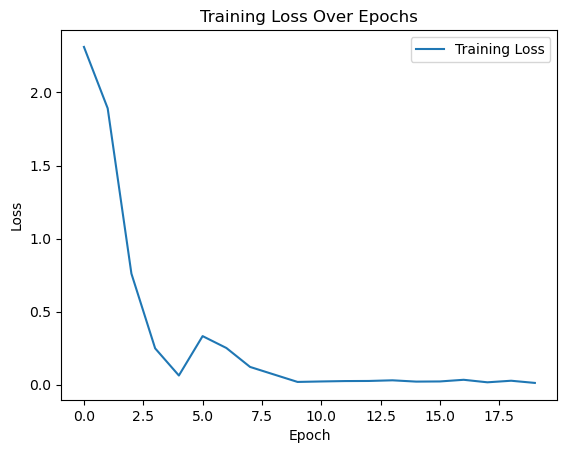

In [10]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()


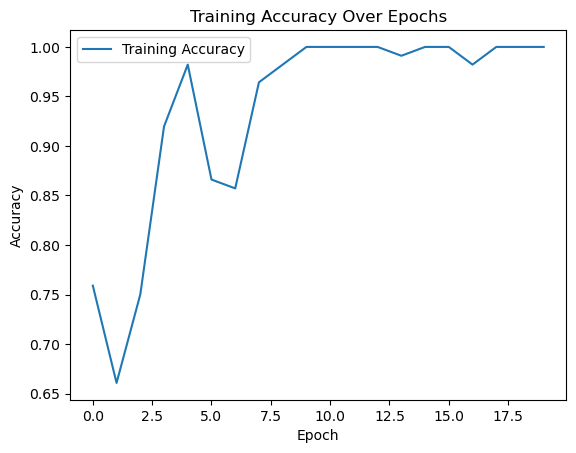

In [11]:
# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.legend()
plt.show()
